<a href="https://colab.research.google.com/github/AftabUdaipurwala/ImageClassification/blob/main/Celebrity_Face_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Image Processing Algorithm using Support Vector machine***

***Loading Data in Dataset***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/py-master/DataScience/CelebrityFaceRecognition/images_dataset/'

In [28]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import seaborn as sns
import cv2
import pywt

In [32]:
# Check couple of images
img =cv2.imread('/content/drive/MyDrive/py-master/DataScience/CelebrityFaceRecognition/images_dataset/maria_sharapova/maria-sharapova (1).jpg')
img.shape

(422, 759, 3)

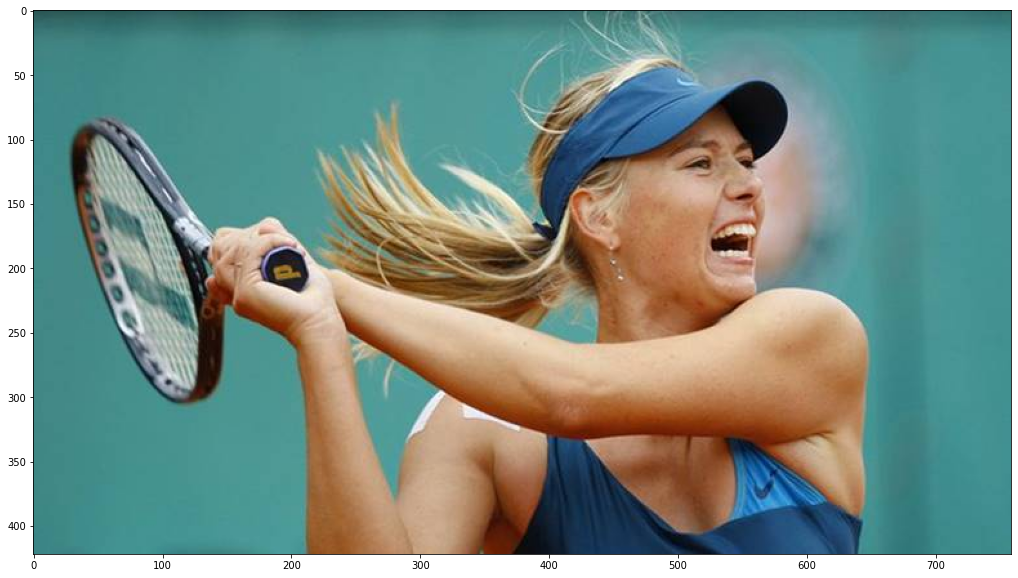

In [34]:
# Check Sharapova , using this cv2.COLOR_BGR2RGB to correct the colours in the image to see it in actual colors else it will show in negative images
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [35]:
# Converting images to gray scale so that you can remove the RGB channels 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape 

(422, 759)